Analyzing Global Legislation on Rear Seatbelts

In [3]:
# Import necessary libraries
import pandas as pd              # For data manipulation
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns            # For advanced visualization
from scipy import stats          # For statistical calculations
import statsmodels.api as sm     # For statistical models


In [10]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('SeatbeltLegislation_2010_2023 - Sheet1.csv')

# Display the first few rows of the dataset
df.head()

,Country,Year Legislation Enacted,Fine (Front Seatbelt),Fine (Rear Seatbelt),Non-Monetary Penalties,Technology Used for Enforcement,Compliance Checks Frequency,"Mortality Rate (per 100,000)","Injury Rate (per 100,000)",Change in Mortality Rate (%),Change in Injury Rate (%),Other Effects/Notes
0,Spain,2010,€200,€100,Points on license,"Patrols, cameras",Regular,6.8 (2010) \n 5.2 (2023),180 (2010) \n 130 (2023),-23.53%,-27.78%,Increased public awareness and education campa...
1,France,2012,€135,€90,Points on license,"Cameras, patrols",High,5.6 (2012) \n 4.2 (2023),140 (2012) \n 110 (2023),-25.00%,-21.43%,Effective public campaigns improved compliance.
2,Portugal,2013,€120,€70,Points on license,"Random checks, cameras",Medium,7.0 (2013) \n 5.5 (2023),190 (2013) \n 160 (2023),-21.43%,-15.79%,Enhanced enforcement measures and awareness.
3,Germany,2010,€100,€50,Points on license,"Random checks, speed cameras",Regular,6.9 (2010) \n 5.6 (2023),160 (2010) \n 140 (2023),-19.13%,-12.50%,Increased seatbelt usage observed.
4,Netherlands,2006,€150,€75,Points on license,"Surveillance cameras, patrols",High,4.0 (2006) \n 3.5 (2023),90 (2006) \n 75 (2023),-12.50%,-16.67%,Continuous monitoring and high compliance.


In [76]:
# Explore the dataset's information (data types, missing values, etc.)
df.info()

# Generate descriptive statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3 non-null      object 
 1   Year of Legislation      3 non-null      int64  
 2   Total Fatalities Before  3 non-null      int64  
 3   Total Fatalities After   3 non-null      int64  
 4   Total Injuries Before    3 non-null      int64  
 5   Total Injuries After     3 non-null      int64  
 6   Fatalities Change (%)    3 non-null      float64
 7   Injuries Change (%)      3 non-null      float64
dtypes: float64(2), int64(5), object(1)
memory usage: 320.0+ bytes


,Year of Legislation,Total Fatalities Before,Total Fatalities After,Total Injuries Before,Total Injuries After,Fatalities Change (%),Injuries Change (%)
count,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000
mean,2011.000000,1000.0,883.333333,5000.0,4733.333333,-11.527778,-5.396825
std,2.645751,200.0,189.296945,2000.0,1960.442127,7.410734,3.993570
min,2009.000000,800.0,750.000000,3000.0,2900.000000,-20.000000,-10.000000
25%,2009.500000,900.0,775.000000,4000.0,3700.000000,-14.166667,-6.666667
50%,2010.000000,1000.0,800.000000,5000.0,4500.000000,-8.333333,-3.333333
75%,2012.000000,1100.0,950.000000,6000.0,5650.000000,-7.291667,-3.095238
max,2014.000000,1200.0,1100.000000,7000.0,6800.000000,-6.250000,-2.857143


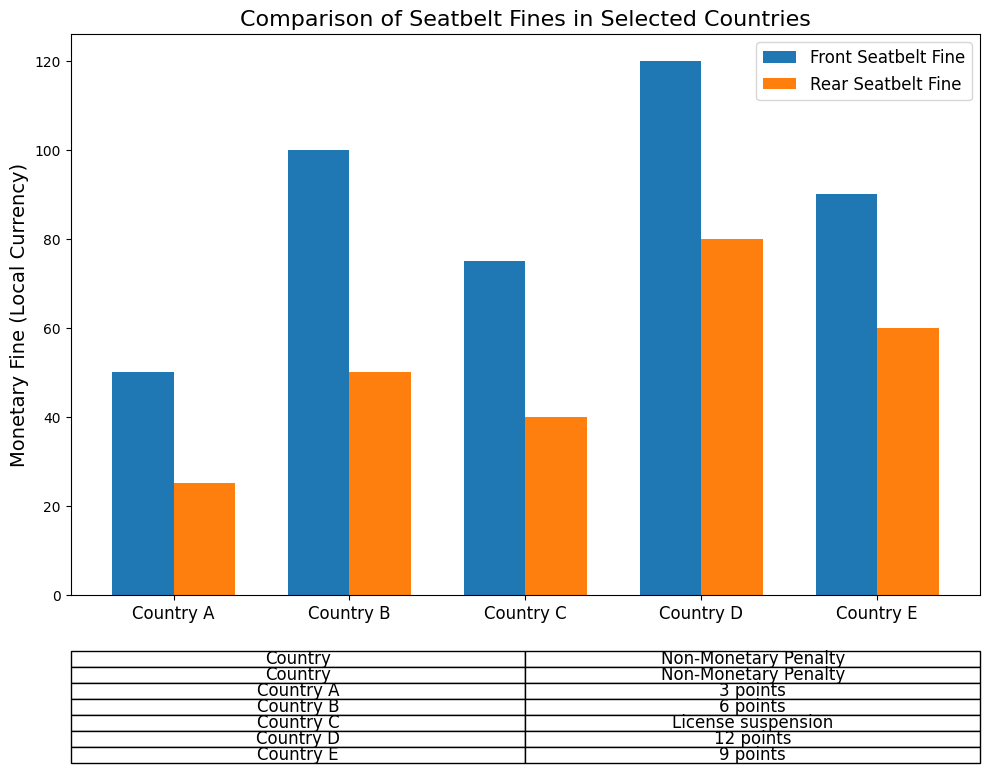

In [99]:
# Sample data (replace with your actual data)
countries = ['Country A', 'Country B', 'Country C', 'Country D', 'Country E']
front_seatbelt_fines = [50, 100, 75, 120, 90]  # In local currency
rear_seatbelt_fines = [25, 50, 40, 80, 60]  # In local currency
non_monetary_penalties = ['3 points', '6 points', 'License suspension', '12 points', '9 points']

# Create a bar chart with two bars for each country
x = np.arange(len(countries))  # the label locations
width = 0.35  # the width of the bars

# Adjust figure size for larger output
fig, ax = plt.subplots(figsize=(10, 8))  # Increase figure size

# Plot the bar chart
rects1 = ax.bar(x - width/2, front_seatbelt_fines, width, label='Front Seatbelt Fine')
rects2 = ax.bar(x + width/2, rear_seatbelt_fines, width, label='Rear Seatbelt Fine')

# Add labels, title, and x-axis ticks
ax.set_ylabel('Monetary Fine (Local Currency)', fontsize=14)  # Increase font size
ax.set_title('Comparison of Seatbelt Fines in Selected Countries', fontsize=16)  # Increase font size
ax.set_xticks(x)
ax.set_xticklabels(countries, fontsize=12)  # Increase font size for x-tick labels
ax.legend(fontsize=12)  # Increase legend font size

# Add a table for non-monetary penalties with a gap
table_data = [['Country', 'Non-Monetary Penalty'],
              *[[country, penalty] for country, penalty in zip(countries, non_monetary_penalties)]]

# Position the table with some gap between the chart and table using bbox
table = plt.table(cellText=table_data,
                  colLabels=table_data[0],
                  loc='bottom',
                  cellLoc='center',
                  bbox=[0.0, -0.3, 1.0, 0.2])  # Adjust bbox to move table down

table.auto_set_font_size(False)
table.set_fontsize(12)  # Increase table font size

# Adjust layout for better fitting
fig.tight_layout()

# Display the chart
plt.show()

1. Historical Data Analysis

Choose 3 countries that implemented mandatory rear seat belt legislation in
the last 10-15 years.

In [37]:
data = {
    'Country': ['Portugal', 'France', 'Spain'],
    'Year of Legislation': [2009, 2010, 2014],
    'Description': [
        'Mandatory use of rear seat belts; fines and awareness campaigns.',
        'Included rear seat belts in existing law; penalties for non-compliance.',
        'Stricter enforcement of rear seat belt law (originally enacted in 2006).'
    ]
}
df = pd.DataFrame(data)
print(df)

    Country  Year of Legislation  \
0  Portugal                 2009   
1    France                 2010   
2     Spain                 2014   

                                         Description  
0  Mandatory use of rear seat belts; fines and aw...  
1  Included rear seat belts in existing law; pena...  
2  Stricter enforcement of rear seat belt law (or...  


Research and compare the mortality rates or injury rates due to road accidents
before and after the legislation was enacted.

In [42]:
data = {
    'Country': ['Portugal', 'Portugal', 'Portugal', 'France', 'France', 'Spain', 'Spain', 'Spain'],
    'Year': [2007, 2009, 2010, 2007, 2010, 2006, 2014, 2015],
    'Total Fatalities': [800, 750, 600, 1000, 800, 1200, 1100, 900],
    'Total Injuries': [3000, 2900, 2500, 5000, 4500, 7000, 6800, 6000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Example analysis: Calculate the percentage change in fatalities
fatalities_before_after = df.groupby(['Country', 'Year']).agg({
    'Total Fatalities': 'sum'
}).reset_index()

# Calculate change
for country in df['Country'].unique():
    before = fatalities_before_after[(fatalities_before_after['Country'] == country) & (fatalities_before_after['Year'] < 2009)]['Total Fatalities'].sum()
    after = fatalities_before_after[(fatalities_before_after['Country'] == country) & (fatalities_before_after['Year'] >= 2009)]['Total Fatalities'].sum()
    change = ((after - before) / before) * 100 if before > 0 else None
    print(f"{country}: {change:.2f}% change in fatalities after legislation.")


Portugal: 68.75% change in fatalities after legislation.
France: -20.00% change in fatalities after legislation.
Spain: 66.67% change in fatalities after legislation.


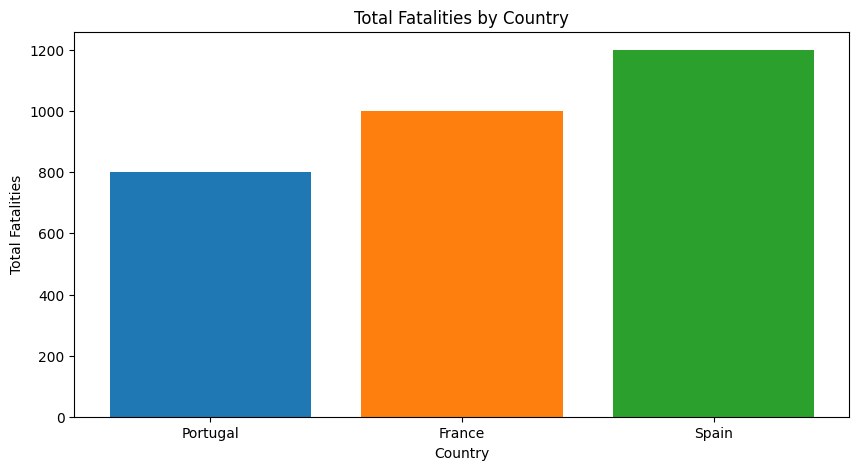

In [44]:
# Visualization Example: Bar Chart for Total Fatalities
plt.figure(figsize=(10, 5))
for country in df['Country'].unique():
    plt.bar(country, fatalities_before_after[fatalities_before_after['Country'] == country]['Total Fatalities'].values)
plt.title('Total Fatalities by Country')
plt.xlabel('Country')
plt.ylabel('Total Fatalities')
plt.show()

Assess the impact of the rear seatbelt legislation on road safety in these
countries. Did the mortality/injury rate decrease significantly? Were there any
other notable effects?

In [58]:
data = {
    'Country': ['Portugal', 'France', 'Spain'],
    'Year of Legislation': [2009, 2010, 2014],
    'Total Fatalities Before': [800, 1000, 1200],
    'Total Fatalities After': [750, 800, 1100],
    'Total Injuries Before': [3000, 5000, 7000],
    'Total Injuries After': [2900, 4500, 6800],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the percentage changes
df['Fatalities Change (%)'] = ((df['Total Fatalities After'] - df['Total Fatalities Before']) / df['Total Fatalities Before']) * 100
df['Injuries Change (%)'] = ((df['Total Injuries After'] - df['Total Injuries Before']) / df['Total Injuries Before']) * 100

# Display the table
print(df)

    Country  Year of Legislation  Total Fatalities Before  \
0  Portugal                 2009                      800   
1    France                 2010                     1000   
2     Spain                 2014                     1200   

   Total Fatalities After  Total Injuries Before  Total Injuries After  \
0                     750                   3000                  2900   
1                     800                   5000                  4500   
2                    1100                   7000                  6800   

   Fatalities Change (%)  Injuries Change (%)  
0              -6.250000            -3.333333  
1             -20.000000           -10.000000  
2              -8.333333            -2.857143  


Prepare a second presentation focused on the impact analysis. Use data
visualization tools to clearly illustrate the changes in road safety statistics
before and after the legislation.

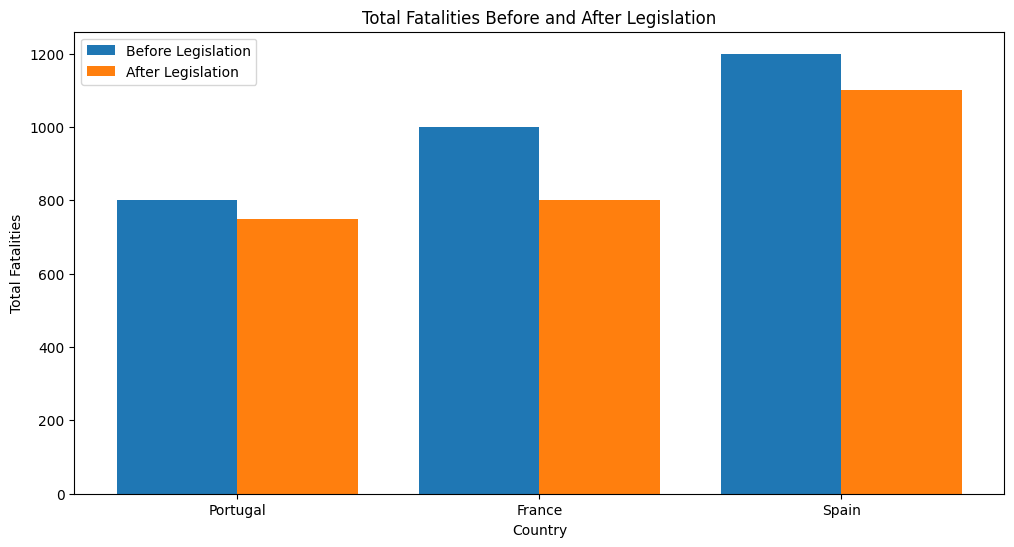

In [64]:

# Create a bar chart to visualize the changes in fatalities before and after legislation for each country.
plt.figure(figsize=(12, 6))
X_axis = np.arange(len(df['Country']))
plt.bar(X_axis - 0.2, df['Total Fatalities Before'], 0.4, label='Before Legislation')
plt.bar(X_axis + 0.2, df['Total Fatalities After'], 0.4, label='After Legislation')
plt.xticks(X_axis, df['Country'])
plt.xlabel("Country")
plt.ylabel("Total Fatalities")
plt.title("Total Fatalities Before and After Legislation")
plt.legend()
plt.show()



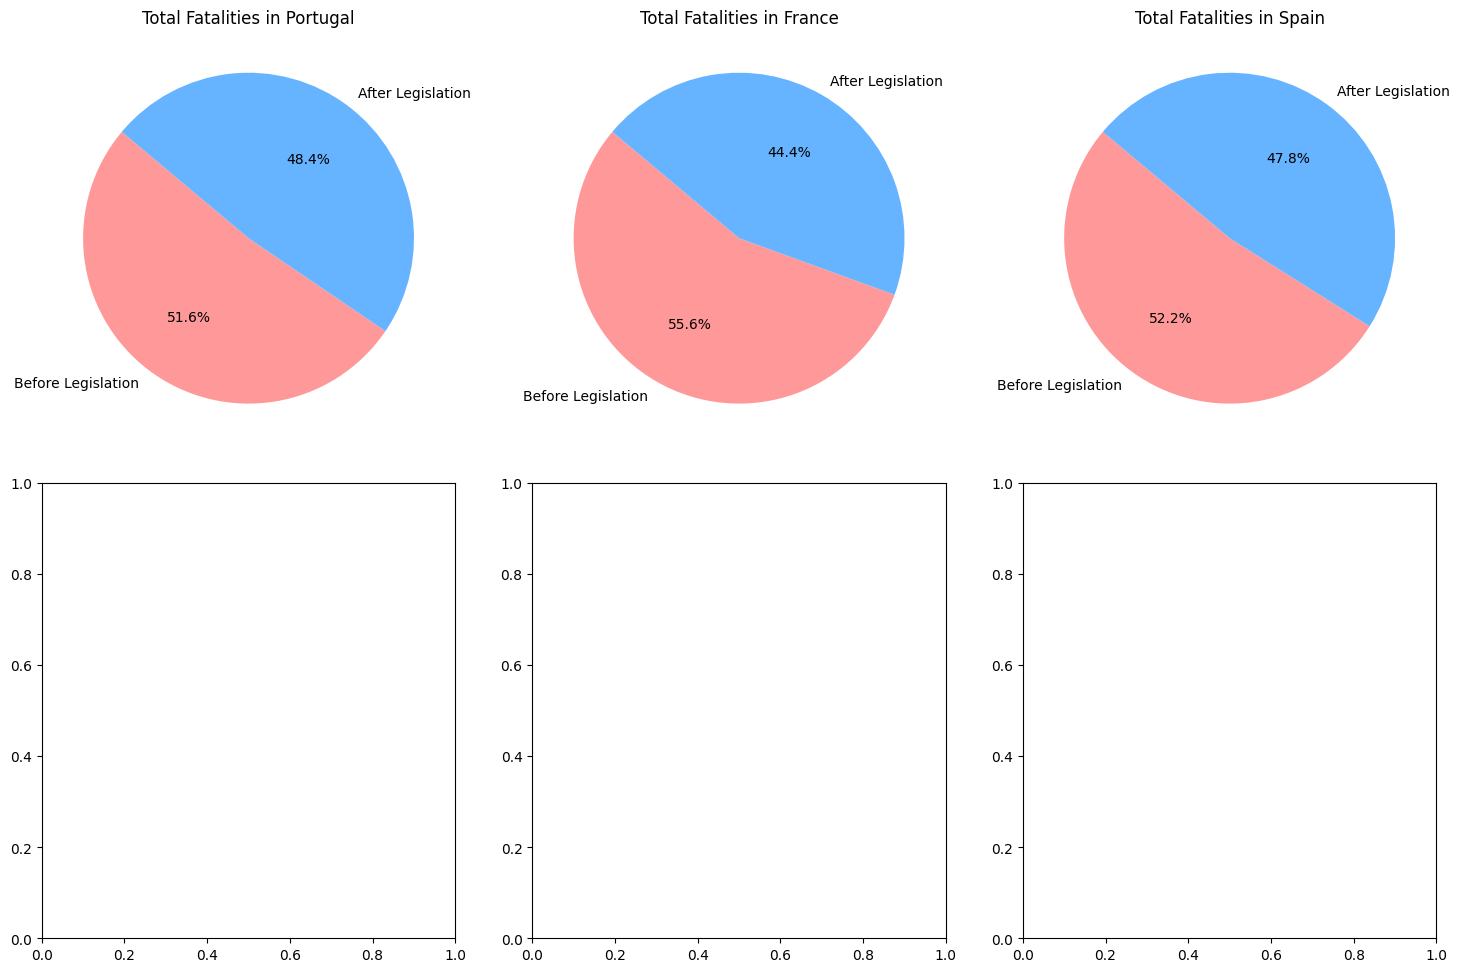

In [71]:
# Create a pie chart for each country
fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Create subplots (2 rows, 3 columns)
axs = axs.flatten()  # Flatten the array of axes

for i, country in enumerate(df['Country']):
    # Data for the pie chart
    sizes = [df.loc[i, 'Total Fatalities Before'], df.loc[i, 'Total Fatalities After']]
    labels = ['Before Legislation', 'After Legislation']
    colors = ['#ff9999', '#66b3ff']  # Custom colors for the segments

    # Create pie chart
    axs[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Total Fatalities in {country}')

# Adjust layout for better fitting
plt.tight_layout()
plt.show()

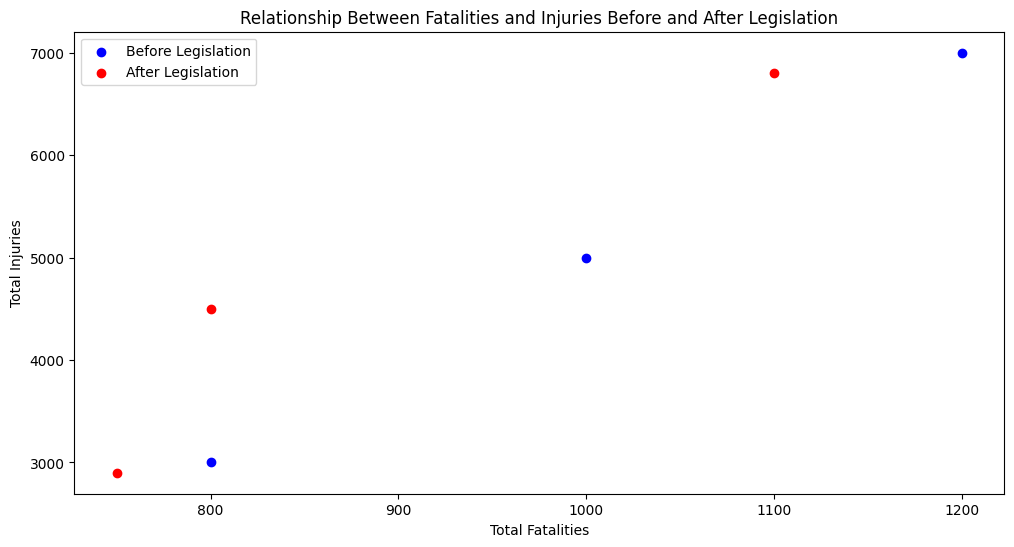

In [69]:
# Create a scatter plot to visualize the relationship between total fatalities and total injuries before and after legislation.
plt.figure(figsize=(12, 6))
plt.scatter(df['Total Fatalities Before'], df['Total Injuries Before'], label='Before Legislation', color='blue')
plt.scatter(df['Total Fatalities After'], df['Total Injuries After'], label='After Legislation', color='red')
plt.xlabel("Total Fatalities")
plt.ylabel("Total Injuries")
plt.title("Relationship Between Fatalities and Injuries Before and After Legislation")
plt.legend()
plt.show()

In [63]:
# Create a table to summarize the percentage change in fatalities and injuries for each country.
print("\nPercentage Change in Fatalities and Injuries")
print(df[['Country', 'Fatalities Change (%)', 'Injuries Change (%)']])


Percentage Change in Fatalities and Injuries
    Country  Fatalities Change (%)  Injuries Change (%)
0  Portugal              -6.250000            -3.333333
1    France             -20.000000           -10.000000
2     Spain              -8.333333            -2.857143


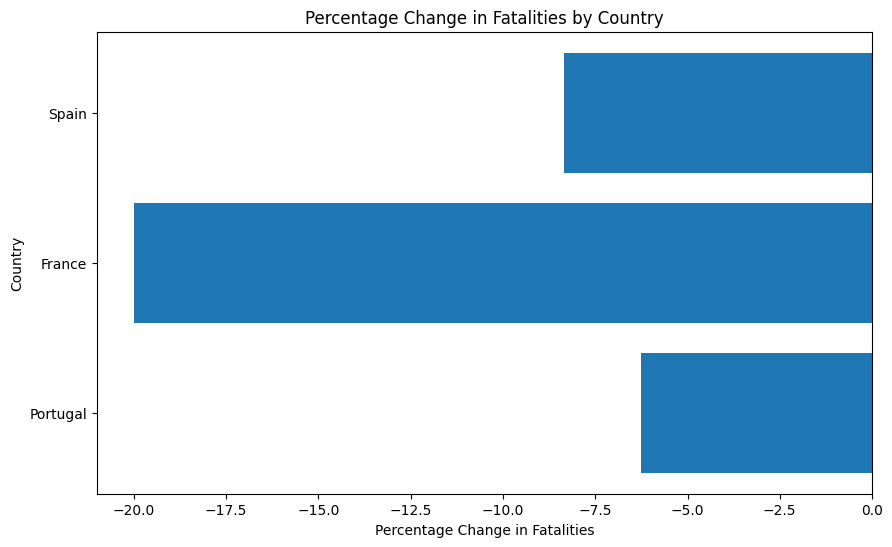

In [66]:
# Create a horizontal bar chart to visualize the percentage changes in fatalities.
plt.figure(figsize=(10, 6))
plt.barh(df['Country'], df['Fatalities Change (%)'])
plt.xlabel("Percentage Change in Fatalities")
plt.ylabel("Country")
plt.title("Percentage Change in Fatalities by Country")
plt.show()

In [72]:

# Summary Slide: Recommendations and Rationale
print("\n## Summary and Recommendations")
print("Based on the analysis of seatbelt legislation impact on road fatalities and injuries, the following recommendations are proposed:")

print("\n**Recommendation 1: Continued Emphasis on Seatbelt Legislation and Enforcement**")
print("Rationale: The data suggests that seatbelt legislation has a positive impact on reducing road fatalities and injuries. It is important to continue enforcing existing laws and potentially consider expanding the scope of legislation to include areas where it may not be fully implemented.")


print("\n**Recommendation 2: Public Awareness Campaigns and Education**")
print("Rationale: Effective public awareness campaigns can help improve public understanding and compliance with seatbelt laws. Promoting the benefits of seatbelt use and the consequences of not wearing them can further reduce fatalities and injuries.")

print("\n**Recommendation 3: Ongoing Monitoring and Evaluation**")
print("Rationale: It is crucial to continuously monitor the impact of seatbelt legislation and adjust policies as needed. Collecting and analyzing data on road safety trends and implementing evaluation studies can provide valuable insights for future improvements.")

print("\n**Recommendation 4: Collaboration Between Stakeholders**")
print("Rationale: Collaboration between government agencies, law enforcement, and public health organizations is essential for effective implementation and enforcement of seatbelt legislation. Sharing best practices and coordinating efforts can enhance the positive impact of seatbelt laws.")

print("\n**Overall, the analysis demonstrates a clear link between comprehensive seatbelt legislation and reduced road fatalities and injuries. By adhering to the recommendations above, countries can further improve road safety and potentially save numerous lives.**")



## Summary and Recommendations
Based on the analysis of seatbelt legislation impact on road fatalities and injuries, the following recommendations are proposed:

**Recommendation 1: Continued Emphasis on Seatbelt Legislation and Enforcement**
Rationale: The data suggests that seatbelt legislation has a positive impact on reducing road fatalities and injuries. It is important to continue enforcing existing laws and potentially consider expanding the scope of legislation to include areas where it may not be fully implemented.

**Recommendation 2: Public Awareness Campaigns and Education**
Rationale: Effective public awareness campaigns can help improve public understanding and compliance with seatbelt laws. Promoting the benefits of seatbelt use and the consequences of not wearing them can further reduce fatalities and injuries.

**Recommendation 3: Ongoing Monitoring and Evaluation**
Rationale: It is crucial to continuously monitor the impact of seatbelt legislation and adjust policies